# Question 1 - a 

A descriptive analysis of the additives (columns named as “a” to “i”), which must include
summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is
a must

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
pwd()

'C:\\Users\\v28si\\Desktop\\CV\\Interviews\\ACE resources'

In [3]:
df_petrol = pd.read_csv('C:\\Users\\v28si\\Desktop\\CV\\Interviews\\ACE resources\\PreScreen_r3_pw - 1234\\PreScreen_r3\\ingredient.csv')

In [4]:
#view first 5 row of data
df_petrol.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [5]:
df_petrol.shape

(214, 9)

In [6]:
# Check for missing data 
df_petrol.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

In [7]:
df_petrol.empty

False

In [8]:
#check data type for each variable
df_petrol.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
dtype: object

# Descriptive Analysis 

In [9]:
df_petrol.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Referring to summary statictics in table above, it is noticed that vaiable 'b', 'e' and 'g' has higher scale compare to other variables.

# Variance and Standard Deviation

In [10]:
# calculate mean
m = sum(df_petrol['b']) / len(df_petrol['b'])

# calculate variance using a list comprehension
var_res = sum((xi - m) ** 2 for xi in df_petrol['b']) / len(df_petrol['b'])
var_res

0.6637252860511837

In [11]:
#variance population
print(np.var(df_petrol))
    

a    0.000009
b    0.663725
c    2.070818
d    0.248105
e    0.597118
f    0.423367
g    2.015902
h    0.246072
i    0.009450
dtype: float64


In [12]:
#standard deviation
print(np.std(df_petrol))

a    0.003030
b    0.814693
c    1.439034
d    0.498102
e    0.772734
f    0.650666
g    1.419824
h    0.496056
i    0.097211
dtype: float64


The standard deviation in variable 'c' and 'g' shows some spread compare to other variables with minimum spread. In other words, variable 'c' and 'g' has slightly higher average distance from their mean compare to other variables in the dataset. 

# Parametric Test

In [13]:
# Correlation between variables
cormat = df_petrol.corr()
round(cormat,5)

,a,b,c,d,e,f,g,h,i
a,1.00000,-0.19189,-0.12227,-0.40733,-0.54205,-0.28983,0.81040,-0.00039,0.14301
b,-0.19189,1.00000,-0.27373,0.15679,-0.06981,-0.26609,-0.27544,0.32660,-0.24135
c,-0.12227,-0.27373,1.00000,-0.48180,-0.16593,0.00540,-0.44375,-0.49226,0.08306
d,-0.40733,0.15679,-0.48180,1.00000,-0.00552,0.32596,-0.25959,0.47940,-0.07440
e,-0.54205,-0.06981,-0.16593,-0.00552,1.00000,-0.19333,-0.20873,-0.10215,-0.09420
f,-0.28983,-0.26609,0.00540,0.32596,-0.19333,1.00000,-0.31784,-0.04262,-0.00772
g,0.81040,-0.27544,-0.44375,-0.25959,-0.20873,-0.31784,1.00000,-0.11284,0.12497
h,-0.00039,0.32660,-0.49226,0.47940,-0.10215,-0.04262,-0.11284,1.00000,-0.05869
i,0.14301,-0.24135,0.08306,-0.07440,-0.09420,-0.00772,0.12497,-0.05869,1.00000


From the above corelation table, variable 'a' and 'g' has the highest, strong positive correlation of (0.81). 
Variable 'a' and 'e' is negatively moderate corelated (-0.54). 
It is also noticible that variable 'a' and 'h' has minimum correlation.
The are some variables with low degree of correlation such as (e & d), 
(i & f), (c & f), (i & d) and others.

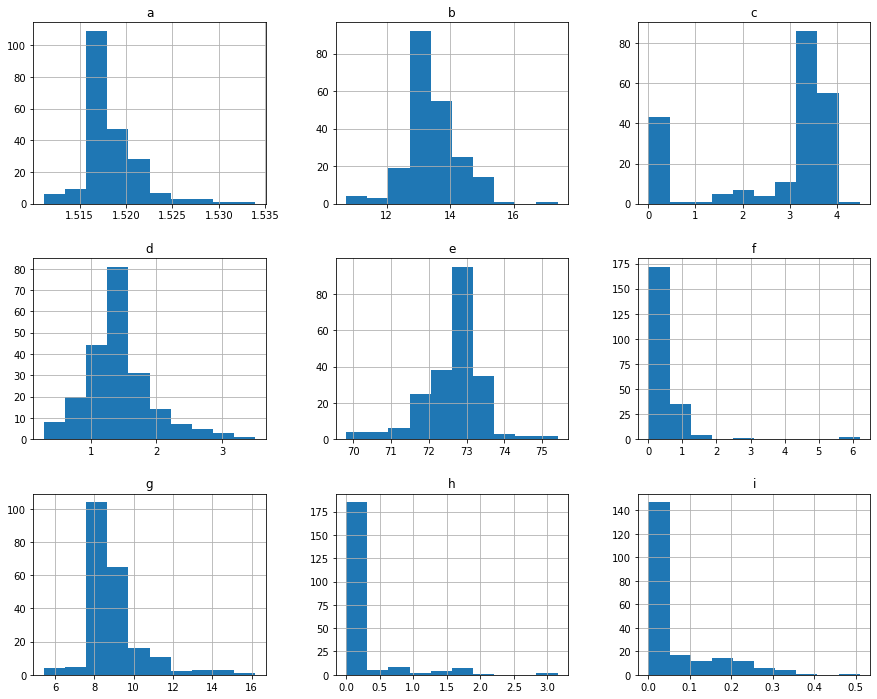

In [14]:
df_petrol.hist(figsize=(15,12))
plt.show()

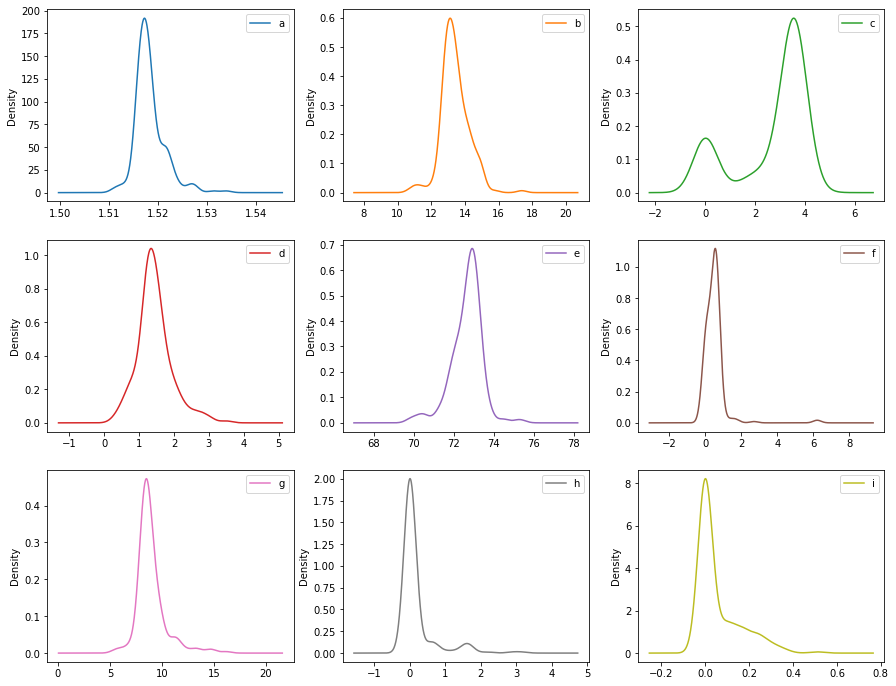

In [15]:
df_petrol.plot(kind='density', subplots=True, layout=(3,3),sharex=False, figsize=(15,12))
plt.show()

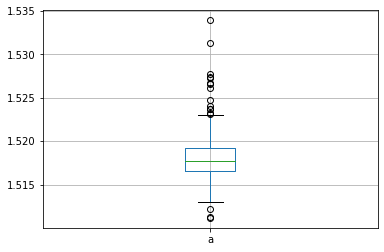

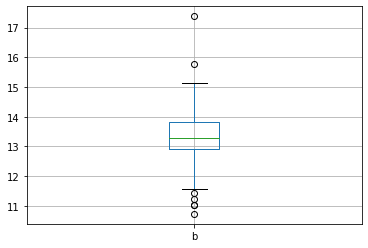

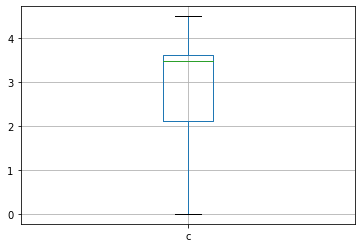

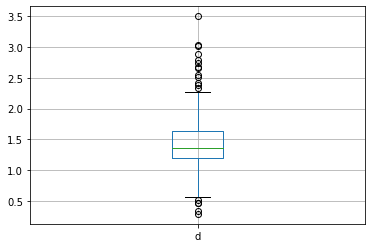

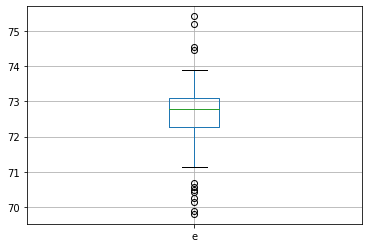

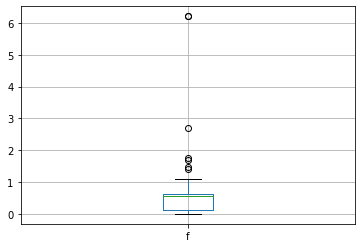

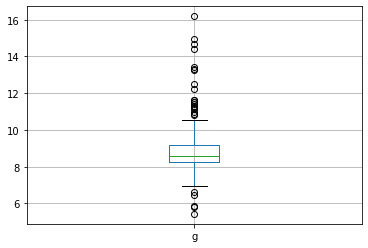

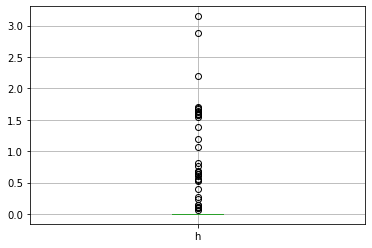

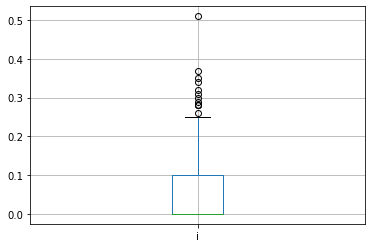

In [16]:
for column in df_petrol:
    plt.figure()
    df_petrol.boxplot([column])
plt.show()

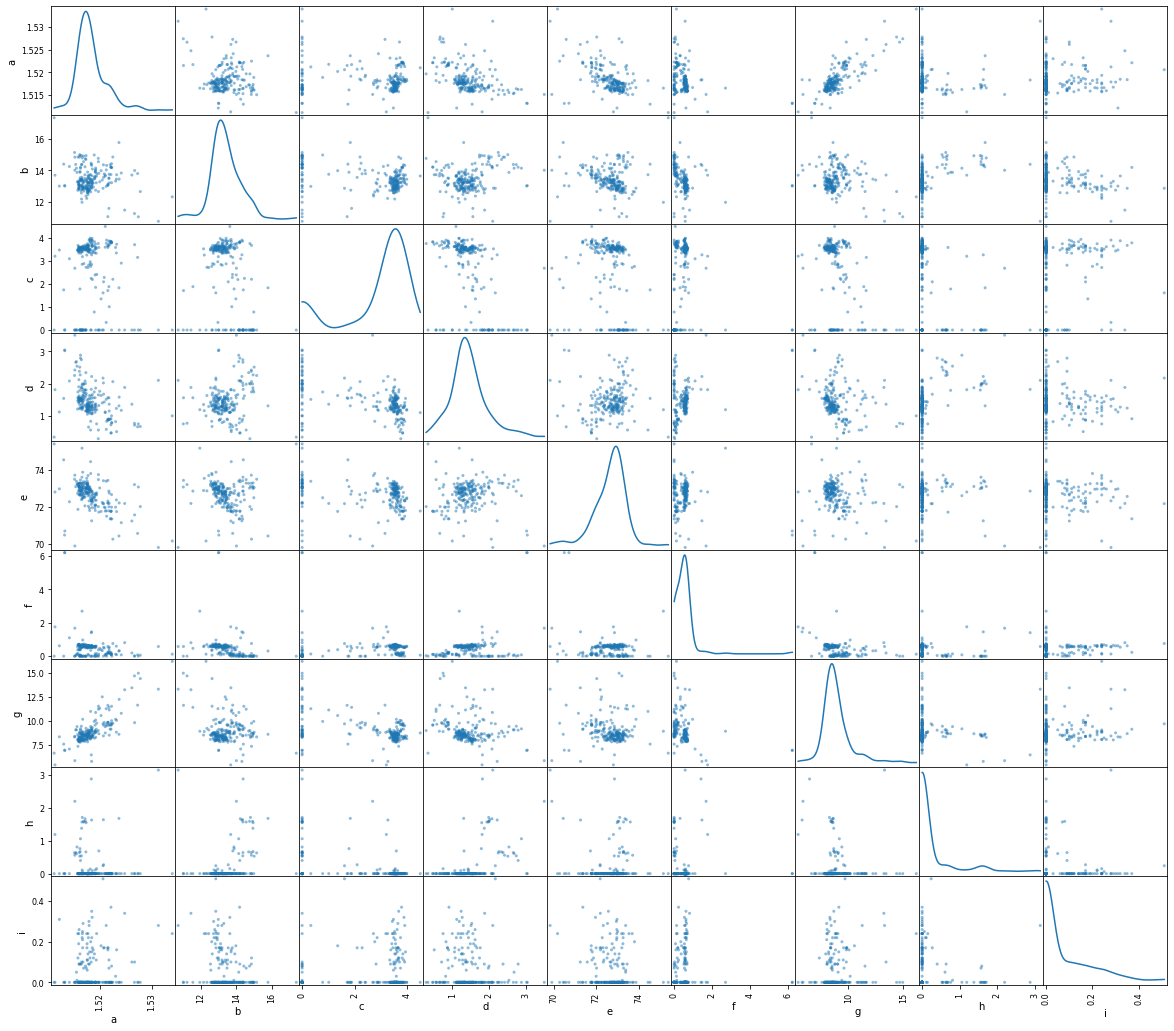

In [17]:
pd.plotting.scatter_matrix(df_petrol,figsize = (20,18),diagonal='kde',)
plt.show()

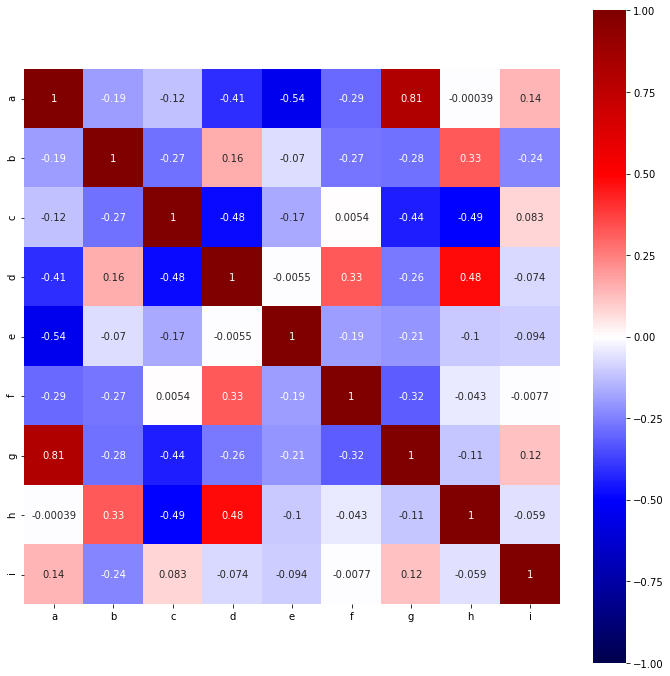

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df_petrol.corr(),annot = True, fmt='.2g',vmin=-1, vmax=1, center= 0,cmap= 'seismic',square=True)
plt.show()

# Clustering

In [26]:
import statsmodels.api as sm
sns.set()
from sklearn.cluster import KMeans

Finding K - Elbow Method

C:\Users\v28si\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


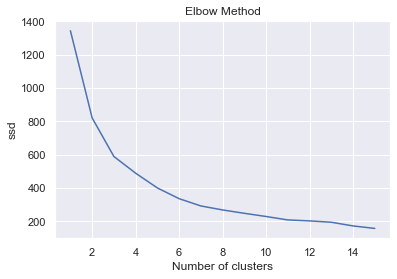

In [27]:
# elbow-curve/SSD
ssd = []
for num_clusters in range(1, 16):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(df_petrol)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range(1, 16), ssd)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('ssd')
plt.show()


From the above elbow method, K=3 

In [30]:
df_petrol2 = df_petrol.copy()

In [31]:
X=df_petrol.iloc[:,: ].values

In [32]:
X

array([[ 1.51735, 13.02   ,  3.54   , ...,  8.44   ,  0.     ,  0.07   ],
       [ 1.53125, 10.73   ,  0.     , ..., 13.3    ,  3.15   ,  0.28   ],
       [ 1.523  , 13.31   ,  3.58   , ..., 10.17   ,  0.     ,  0.03   ],
       ...,
       [ 1.51784, 12.68   ,  3.67   , ...,  8.7    ,  0.     ,  0.     ],
       [ 1.51841, 12.93   ,  3.74   , ...,  8.96   ,  0.     ,  0.22   ],
       [ 1.51321, 13.     ,  0.     , ...,  6.93   ,  0.     ,  0.     ]])

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X)
df_petrol2['cluster'] = y_kmeans

In [34]:
y_kmeans

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [35]:
df_petrol2.head()

,a,b,c,d,e,f,g,h,i,cluster
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,1
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,1
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,1


In [36]:
len(y_kmeans)

214

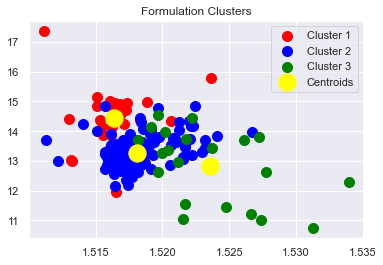

In [37]:
#Visualising the clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')

#Plot the centroid. This time we're going to use the cluster centres  
#attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label = 'Centroids')
plt.title('Formulation Clusters')
plt.legend()
plt.show()


Dendogram

In [38]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

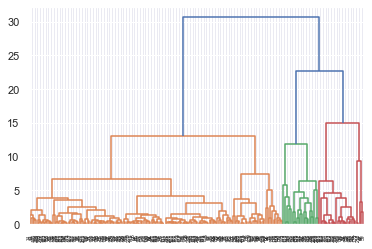

In [41]:
# complete linkage
mergings = linkage(df_petrol,method="ward", metric='euclidean')
dendrogram(mergings)
plt.show()

conclusion, from both the clustering methods, the output shows three clusters hence there are three distinctive number
of formulations present in the dataset.